In [1]:
from sklearn.datasets import make_blobs
# Using 2 features here simply for the ease of visualization, the algorithm generalizes to any dimension
X, y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=0, cluster_std=0.8)

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import random


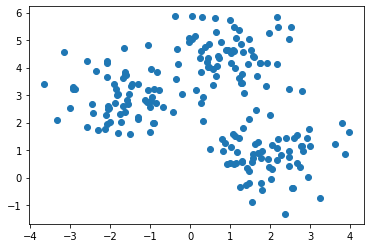

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [4]:
# Given a sample with any number of features, and a centroid with the same number of features, find the Cartesian distance
# between them
def compute_distance_to_centroid(sample, centroid):
    num_of_features = len(sample) # should be the same as the number of features for the centroid. In this case, 2
    acc = 0
    for idx, sample in enumerate(sample):
        acc = acc + (sample - centroid[idx]) ** 2
    return math.sqrt(acc)

# Randomly initializes k centroids.
# You need to pass X so the domain for each feature can be determined.
def initialize_centroids(k, X):
    min_values = np.amin(X, axis = 0)
    max_values = np.amax(X, axis = 0)
    centroids = np.zeros((k, len(X[0]))) # len(X[0]) simply represents the number of features
    # Loop over min and max value arrays in parallel and generate a random value between these values
    for cluster_idx in range(k):
        for idx in range(len(min_values)): 
            centroids[cluster_idx][idx] = random.uniform(min_values[idx], max_values[idx])
    return centroids

# Given a sample and a list of centroids, returns the centroid closest to the sample
def find_best_centroid(sample, centroids):
    distances = np.zeros((len(centroids)))
    for idx, centroid in enumerate(centroids):
        distances[idx] = compute_distance_to_centroid(sample, centroid)
    return (np.argmin(distances), np.amin(distances))

In [5]:
def perform_k_means_iteration():
    # These 2 arrays are used to keep track of the centroids at the beginning and end of an iteration
    previous_centroids = initialize_centroids(3, X)
    next_centroids = np.zeros((3, len(X[0])))

    # This array represents the optimal centroid associated to each sample (ie the closest centroid to a given sample)
    optimal_centroids = np.zeros((len(X)))

    has_converged = False
    iteration_count = 0
    inertia = 0
    while not has_converged:
        iteration_count += 1
        inertia = 0 # reset inertia for the newest values of centroids
        # We recenter each centroid based on the mean of all samples in its cluster
        for centroid_idx in range(len(previous_centroids)):
            for inner_idx, sample in enumerate(X):
                # The tuple holds both the optimal centroid and the distance to it.
                best_centroid_tuple = find_best_centroid(sample, previous_centroids)
                optimal_centroids[inner_idx] = best_centroid_tuple[0]
                inertia += best_centroid_tuple[1]
            # Indicies of all samples in the current centroid's cluster
            indices_for_centroid = np.where(optimal_centroids == centroid_idx)
            values_in_cluster = X[indices_for_centroid]
            if len(values_in_cluster) == 0:
                print('Aborting due to empty cluster')
                return (previous_centroids, inertia)
            next_centroids[centroid_idx, :] = np.mean(values_in_cluster, axis = 0)    
        if np.array_equal(next_centroids, previous_centroids):
            has_converged = True
        else:
            previous_centroids = next_centroids
    print('K Means converged after {} iterations'.format(iteration_count))
    print('Model has inertia of {}'.format(inertia))
    return (previous_centroids, inertia)
    
# n represents the number of training iterations we want.
# The function will return the centroids with the smallest inertia
def perform_k_means(n):
    k_means_iteration_res = perform_k_means_iteration()
    min_inertia = k_means_iteration_res[1]
    optimal_centroids = k_means_iteration_res[0]
    for iteration in range(n - 1):
        k_means_iteration_res = perform_k_means_iteration()
        centroids = k_means_iteration_res[0]
        inertia = k_means_iteration_res[1]
        if inertia < min_inertia:
            min_inertia = inertia
            optimal_centroids = centroids
    return (optimal_centroids, min_inertia)

k_means_res = perform_k_means(10)
optimal_centroids = k_means_res[0]
print(k_means_res[1])

K Means converged after 2 iterations
Model has inertia of 730.6709607691574
K Means converged after 2 iterations
Model has inertia of 820.8628687275792
K Means converged after 2 iterations
Model has inertia of 826.4861479111601
Aborting due to empty cluster
K Means converged after 2 iterations
Model has inertia of 661.0375014008489
K Means converged after 2 iterations
Model has inertia of 797.3876242002043
K Means converged after 2 iterations
Model has inertia of 963.8732107339422
K Means converged after 2 iterations
Model has inertia of 732.7444262609052
K Means converged after 2 iterations
Model has inertia of 595.3261136125411
K Means converged after 2 iterations
Model has inertia of 686.9975703695627
595.3261136125411


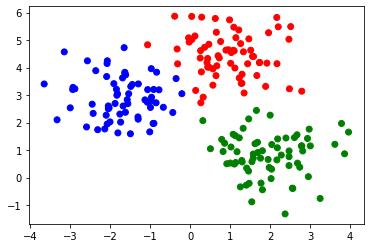

In [6]:
closest_centroids = np.zeros((len(X)))
for idx, sample in enumerate(X):
    closest_centroids[idx] = find_best_centroid(sample, optimal_centroids)[0]
colors = ['red','green', 'blue']
# plot the data for visualization
plt.scatter(X[:, 0], X[:, 1], c=closest_centroids, cmap=matplotlib.colors.ListedColormap(colors))

In [9]:
import sys
sys.maxsize

9223372036854775807